In [35]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
import os

In [36]:
### Load data about metrics into dataframes
# load results.pickle
with open(os.path.join('..', 'Modeling', 'results.pickle'), 'rb') as file:
    all_results = pickle.load(file)

# get separate dataframes for multiclass and binary classification tasks
multiclass = pd.DataFrame({key: all_results[key]['final_results']['metric_values'] for key in all_results.keys() if len(all_results[key]['final_results']['classes']) > 2})
binary = pd.DataFrame({key: all_results[key]['final_results']['metric_values'] for key in all_results.keys() if len(all_results[key]['final_results']['classes']) == 2})

# for metrics like accuracy, precision, etc the values are stored on a by-cell-type basis. Take the balanced average of these values for final values per model per metric
multiclass_df = multiclass.map(np.mean)
binary_df = binary.map(np.mean)

# display results
display(multiclass_df)
display(binary_df)

All Cells                       \
              RandomForestClassifier KNeighborsClassifier   
accuracy                    0.838889             0.823932   
precision                   0.523155             0.478315   
sensitivity                 0.515417             0.469929   
specificity                 0.902634             0.893579   
ROC AUC (OVO)               0.840858             0.818663   
ROC AUC (OVR)               0.840056             0.817661   

                    L1 and L2 and RL                       
              RandomForestClassifier KNeighborsClassifier  
accuracy                    0.807910             0.767554  
precision                   0.706308             0.640535  
sensitivity                 0.699061             0.630743  
specificity                 0.854440             0.822425  
ROC AUC (OVO)               0.855154             0.827075  
ROC AUC (OVR)               0.859000             0.831827

L1 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.705882             0.745098   
precision                 0.705882             0.757009   
sensitivity               0.698997             0.733928   
specificity               0.698997             0.733928   
ROC AUC                   0.828750             0.830237   

                         L2 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.825455             0.796364   
precision                 0.830492             0.816547   
sensitivity               0.811506             0.772882   
specificity               0.811506             0.772882   
ROC AUC                   0.889213             0.876393   

                         L3 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.810924             0.806723   
precision                 0.812500             0.807352   
sensitivity               0.811507             0.807092   
specificity               0.811507             0.807092   
ROC AUC                   0.890160             0.883132   

                  Monoblast and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.836134             0.777311   
precision                 0.836018             0.778216   
sensitivity               0.836136             0.776427   
specificity               0.836136             0.776427   
ROC AUC                   0.920577             0.825290   

                 Myeloblast and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.789256             0.719008   
precision                 0.789844             0.718795   
sensitivity               0.789983             0.718974   
specificity               0.789983             0.718974   
ROC AUC                   0.859795             0.759009   

                 All blasts and RL                       
            RandomForestClassifier KNeighborsClassifier  
accuracy                  0.856410             0.856410  
precision                 0.721485             0.719225  
sensitivity               0.556372             0.559929  
specificity               0.556372             0.559929  
ROC AUC                   0.795940             0.735777

In [37]:
### Get accuracy values for a bar plot
# get a single multiindexed Pandas Series with accuracy for all classification tasks
accuracy_values = pd.concat([multiclass_df, binary_df], axis=1).loc['accuracy']
# unstack this series
accuracy_values = accuracy_values.reset_index(name='accuracy')
accuracy_values.columns = ['Classification Task', 'Classifier', 'accuracy']
# display the values
display(accuracy_values)

,Classification Task,Classifier,accuracy
0,All Cells,RandomForestClassifier,0.838889
1,All Cells,KNeighborsClassifier,0.823932
2,L1 and L2 and RL,RandomForestClassifier,0.807910
3,L1 and L2 and RL,KNeighborsClassifier,0.767554
4,L1 and RL,RandomForestClassifier,0.705882
5,L1 and RL,KNeighborsClassifier,0.745098
6,L2 and RL,RandomForestClassifier,0.825455
7,L2 and RL,KNeighborsClassifier,0.796364
8,L3 and RL,RandomForestClassifier,0.810924
9,L3 and RL,KNeighborsClassifier,0.806723


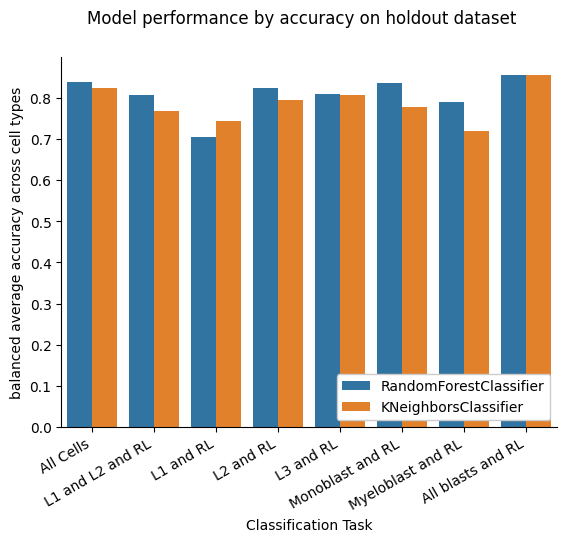

In [38]:
### Plot these accuracy values
sns.barplot(data = accuracy_values, x='Classification Task', y='accuracy', hue='Classifier')
plt.xticks(rotation=30, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right', framealpha=1)
plt.suptitle('Model performance by accuracy on holdout dataset')
plt.ylabel('balanced average accuracy across cell types')
plt.savefig(f"model_performance_600dpi.png", dpi=600)
plt.show()